In [1]:
###Q3. (20 pts) While evaluating a classifier, it is important to understand whether it is overfitting on the
###training data. One way to check is by computing a classifier’s learning curve; it shows a measure of
###performance (e.g., accuracy) as the classifier is trained and tested (cross-validated) with increasingly
###more data. If the curves do not converge, there is overfitting.

In [2]:
# code provided by professor
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.learning_curve import learning_curve
Xy = np.loadtxt("q3_data.csv", delimiter=",")
X = Xy[:,:20]
y = Xy[:,20]
train_sizes_abs, train_scores, test_scores = learning_curve(LinearSVC(C=10),
X, y, cv=5, n_jobs=1, train_sizes = np.linspace(.05, 0.2, 5))
print (np.mean(train_scores, axis=1))
test_scores_mean = np.mean(test_scores, axis=1)
print (test_scores_mean)

[ 1.          1.          1.          0.99069767  0.98490566]
[ 0.87595262  0.86896252  0.86290247  0.86795252  0.88097272]


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cross_validation

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

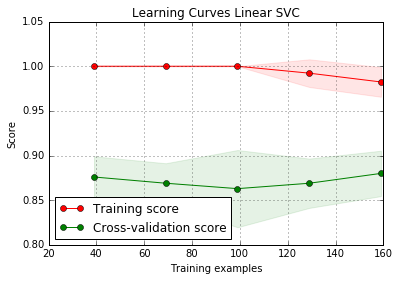

In [6]:
title = "Learning Curves Linear SVC"
plot_learning_curve(LinearSVC(C=10), title, X, y, cv=5, n_jobs=1, train_sizes = np.linspace(.05, 0.2, 5))
plt.show()

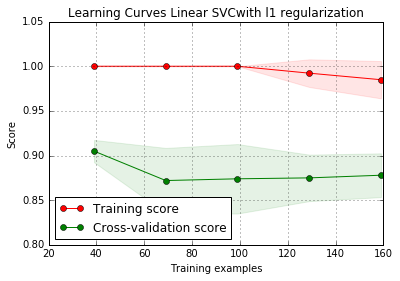

In [7]:
# l2 regularization is default, lets change it to l1 and see
plot_learning_curve(LinearSVC(C=10, penalty='l1', dual=False), title + "with l1 regularization", X, y, cv=5, n_jobs=1, train_sizes = np.linspace(.05, 0.2, 5))
plt.show()

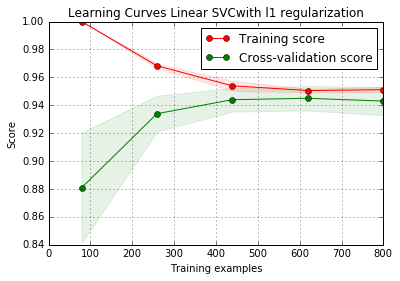

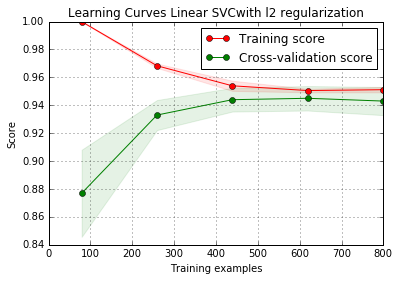

In [9]:
# definitely providing more training inputs and various penalty "regularisation" help decrease in overfitting the data
plot_learning_curve(LinearSVC(C=10, penalty='l1', dual=False), title + "with l1 regularization", X, y,
                    cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plot_learning_curve(LinearSVC(C=10, penalty='l2', dual=False), title + "with l2 regularization", X, y,
                    cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()